<a href="https://colab.research.google.com/github/luxman21/TensorFlowExamPrep/blob/main/twImageClassificationProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Weather Prediction</h1>


In [18]:
from shutil import copyfile
import tensorflow as tf
from tensorflow.python import keras
import numpy as np
import zipfile 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import os

In [2]:
# import the data set and perform and exploratory data analysis 
!wget https://md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com/4drtyfjtfy-1.zip

#unzip the file 
file_ref = zipfile.ZipFile('/content/4drtyfjtfy-1.zip', "r")
file_ref.extractall()
file_ref.close()

--2021-03-14 17:11:42--  https://md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com/4drtyfjtfy-1.zip
Resolving md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com (md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com)... 52.218.28.128
Connecting to md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com (md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com)|52.218.28.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 95592747 (91M) [application/octet-stream]
Saving to: ‘4drtyfjtfy-1.zip’

4drtyfjtfy-1.zip    100%[===================>]  91.16M  20.8MB/s    in 5.2s    

2021-03-14 17:11:48 (17.6 MB/s) - ‘4drtyfjtfy-1.zip’ saved [95592747/95592747]



In [3]:
# the zip file contains another zip file 
file_ref = zipfile.ZipFile('/content/dataset2.zip', "r")
file_ref.extractall()
file_ref.close()

In [4]:
# how to walk donwn a directory and list the files 
for dirPath, dirnames, filenames in os.walk('dataset2'): 
  print(f" Number of folder {len(dirnames)} , and number of files {len(filenames)}")

 Number of folder 0 , and number of files 1125


In [5]:
# these are the image classes: cloudy, rain, shine and sunrise 
# add the path files to the right list
countOfClasses = {'cloudy' : 0  , 'rain' : 0 , 'shine':0 , 'sunrise':0}

CLOUDY = 'cloudy'
RAIN = 'rain'
SHINE = 'shine'
SUNRISE = 'sunrise'

listCloudy = []
listRain = []
listShine = []
listSunrise = []

countOfClasses = {'cloudy' : 0  , 'rain' : 0 , 'shine':0 , 'sunrise':0}
for filenames in os.listdir('/content/dataset2'):
  prefixPath = '/dataset2/'
  if CLOUDY in str(filenames):
    countOfClasses[CLOUDY] += 1
    listCloudy.append(prefixPath + filenames)

  elif RAIN in str(filenames):
    countOfClasses[RAIN] +=1
    listRain.append(prefixPath + filenames)

  elif SHINE in str(filenames):
    countOfClasses[SHINE] +=1
    listShine.append(prefixPath + filenames)

  elif SUNRISE in str(filenames): 
    countOfClasses[SUNRISE] +=1
    listSunrise.append(prefixPath + filenames)

  else: 
    countOfClasses['na'] +=1

In [6]:
# randomly shuddle the dataset
random.seed(3)
for keyvalues in countOfClasses.keys():
  listPrefix = "list"
  random.shuffle(eval(listPrefix + keyvalues.capitalize()))

In [7]:
# function to split the data by number of training and test size for each class
def constructDataSet (directoryName, trainingSizePercent):
  rootPath = '/content/'+directoryName

  try : 
    print("TRY is working")
    os.mkdir(rootPath)
    os.mkdir(rootPath+'/training/')
    os.mkdir(rootPath+'/testing/')
  except OSError: 
    pass
  print("Exit Try ")
  # make a sub training and testing folder for each class 
  for keyValue in countOfClasses.keys(): 
    trainingPath = rootPath+'/training/'+keyValue
    testingPath = rootPath+'/testing/'+keyValue
    try :
      os.mkdir(trainingPath)
      os.mkdir(testingPath)
    except OSError: 
      pass

    # copy the files to the right folders 
    consideredList = eval('list'+ keyValue.capitalize())
    lenList = len(consideredList)
    traingSize = int( lenList * (trainingSizePercent/100) )
    #testSize = int(lenList - traingSize)
    
    # copying the files to the right path
    trainingFilePaths = consideredList[:traingSize] 
    testingFilePaths = consideredList[traingSize:]
    print(f" The considered class is : {keyValue} , Total list len { len(consideredList)} , train and test list {len (trainingFilePaths)} {len(testingFilePaths)}")
    for fileTrain in trainingFilePaths:
      currentFrom = '/content' + fileTrain 
      currentDestination = trainingPath+ fileTrain[9:] 
      copyfile(currentFrom , currentDestination)

    for fileTest in testingFilePaths:
      currentFrom = '/content' + fileTest 
      currentDestination = testingPath+ fileTest[9:] 
      copyfile(currentFrom , currentDestination)


In [8]:
TRAIN_PERCENT = 70
constructDataSet("dataset", TRAIN_PERCENT)
#!rm -rf "/content/dataset"

TRY is working
Exit Try 
 The considered class is : cloudy , Total list len 300 , train and test list 210 90
 The considered class is : rain , Total list len 215 , train and test list 150 65
 The considered class is : shine , Total list len 253 , train and test list 177 76
 The considered class is : sunrise , Total list len 357 , train and test list 249 108


In [9]:
def takeRandomImage(target_dir, target_class):
  target_folder = target_dir+target_class

  # path of random image
  random_image = random.sample(os.listdir(target_folder), 1)

  # display the image
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}")

  return img

Image shape: (162, 243, 3)


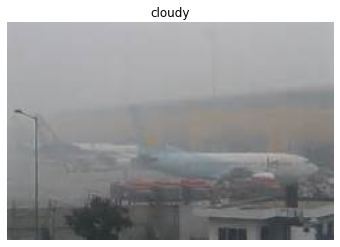

In [10]:
imgSample = takeRandomImage('/content/dataset/training/', 'cloudy')

# Process the image data for classification 


In [42]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
TRAINING_DIR = "/content/dataset/training"
TESTING_DIR = "/content/dataset/testing"

# Rescale the data and create data generator instances
train_datagen = ImageDataGenerator(rescale=1/255. , 
                                   featurewise_center=False,
                                   samplewise_center=False,
                                   featurewise_std_normalization=False,
                                   samplewise_std_normalization=False,
                                   brightness_range=[0.5 , 0.9],
                                   fill_mode="nearest",
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   dtype=None,)

test_datagen = ImageDataGenerator(rescale=1/255. , 
)
# test_datagen = ImageDataGenerator(rescale=1/255. , 
#                                    featurewise_center=False,
#                                    samplewise_center=False,
#                                    featurewise_std_normalization=False,
#                                    samplewise_std_normalization=False,
#                                    brightness_range=[0.5 , 0.9],
#                                    fill_mode="nearest",
#                                    horizontal_flip=True,
#                                    vertical_flip=True,
#                                    dtype=None,)

# Load data in from directories and turn it into batches
train_data = train_datagen.flow_from_directory(TRAINING_DIR,
                                               target_size=(250, 250),
                                               batch_size=16,
                                               color_mode="rgb",
                                               shuffle=True,
                                               seed=3,
                                               interpolation="nearest",
                                               class_mode='categorical') # changed to categorical

test_data = test_datagen.flow_from_directory(TESTING_DIR,
                                              target_size=(250, 250),
                                               batch_size=16,
                                               color_mode="rgb",
                                               shuffle=True,
                                               seed=3,
                                               interpolation="nearest",
                                               class_mode='categorical')


Found 786 images belonging to 4 classes.
Found 339 images belonging to 4 classes.


In [43]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(250,250,3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=384, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(4, activation='softmax')
])

model.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [44]:
# Check model architecture
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_35 (Conv2D)           (None, 60, 60, 96)        34944     
_________________________________________________________________
batch_normalization_35 (Batc (None, 60, 60, 96)        384       
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 29, 29, 96)        0         
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 29, 29, 256)       614656    
_________________________________________________________________
batch_normalization_36 (Batc (None, 29, 29, 256)       1024      
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 14, 14, 256)       0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 14, 14, 384)      

In [45]:
# train the model 
history = model.fit(train_data,
                        epochs=25,
                        verbose=1,
                        validation_data=test_data,
                       )

Epoch 1/25
50/50 [==============================] - 10s 187ms/step - loss: 19.4482 - accuracy: 0.5246 - val_loss: 1096.4039 - val_accuracy: 0.3186
Epoch 2/25
50/50 [==============================] - 9s 180ms/step - loss: 6.0558 - accuracy: 0.5641 - val_loss: 5.9759 - val_accuracy: 0.4543
Epoch 3/25
50/50 [==============================] - 9s 181ms/step - loss: 3.2209 - accuracy: 0.6402 - val_loss: 18.2323 - val_accuracy: 0.2330
Epoch 4/25
50/50 [==============================] - 9s 176ms/step - loss: 3.8768 - accuracy: 0.5929 - val_loss: 3.1996 - val_accuracy: 0.3333
Epoch 5/25
50/50 [==============================] - 9s 184ms/step - loss: 1.1008 - accuracy: 0.6510 - val_loss: 1.1273 - val_accuracy: 0.6372
Epoch 6/25
50/50 [==============================] - 9s 185ms/step - loss: 2.1156 - accuracy: 0.6415 - val_loss: 0.8791 - val_accuracy: 0.6814
Epoch 7/25
50/50 [==============================] - 9s 180ms/step - loss: 3.6526 - accuracy: 0.6545 - val_loss: 10.5227 - val_accuracy: 0.6667

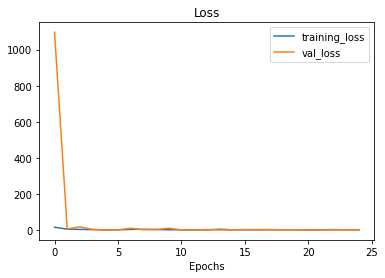

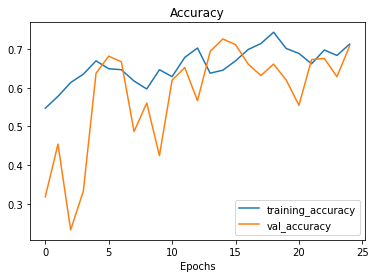

In [61]:
loss = history.history['loss']
val_loss = history.history['val_loss']

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

epochs = range(len(history.history['loss']))

  # Plot loss
plt.plot(epochs, loss, label='training_loss')
plt.plot(epochs, val_loss, label='val_loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.legend()

  # Plot accuracy
plt.figure()
plt.plot(epochs, accuracy, label='training_accuracy')
plt.plot(epochs, val_accuracy, label='val_accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.legend();

In [73]:
!wget "https://images.unsplash.com/photo-1594156596782-656c93e4d504?ixid=MXwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHw%3D&ixlib=rb-1.2.1&auto=format&fit=crop&w=1275&q=80" -O"/content/test1"
!wget 'https://images.unsplash.com/photo-1488034976201-ffbaa99cbf5c?ixid=MXwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHw%3D&ixlib=rb-1.2.1&auto=format&fit=crop&w=1234&q=80' -O"/content/test2"
!wget "https://images.unsplash.com/photo-1508669599492-fd102379df98?ixid=MXwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHw%3D&ixlib=rb-1.2.1&auto=format&fit=crop&w=2250&q=80" -O"/content/test3"



--2021-03-14 20:19:17--  https://images.unsplash.com/photo-1594156596782-656c93e4d504?ixid=MXwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHw%3D&ixlib=rb-1.2.1&auto=format&fit=crop&w=1275&q=80
Resolving images.unsplash.com (images.unsplash.com)... 151.101.54.208, 2a04:4e42:d::720
Connecting to images.unsplash.com (images.unsplash.com)|151.101.54.208|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 310329 (303K) [image/jpeg]
Saving to: ‘/content/test1’

/content/test1      100%[===================>] 303.06K  --.-KB/s    in 0.02s   

2021-03-14 20:19:17 (14.3 MB/s) - ‘/content/test1’ saved [310329/310329]

--2021-03-14 20:19:17--  https://images.unsplash.com/photo-1488034976201-ffbaa99cbf5c?ixid=MXwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHw%3D&ixlib=rb-1.2.1&auto=format&fit=crop&w=1234&q=80
Resolving images.unsplash.com (images.unsplash.com)... 151.101.54.208, 2a04:4e42:d::720
Connecting to images.unsplash.com (images.unsplash.com)|151.101.54.208|:443... connected.
HTTP r

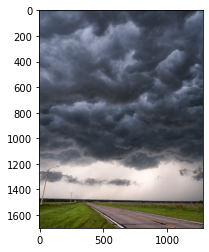

In [59]:
img = mpimg.imread('/content/test1')
plt.imshow(img)

In [67]:
# Create a function to import an image and resize it to be able to be used with our modle
def load_and_prep_image(filename, img_shape=250):
  """
  Reads in an image from filename, turns it into a tensor and reshapes into
  (224, 224, 3).
  """
  # Read in the image
  img = tf.io.read_file(filename)
  # Decode it into a tensor
  img = tf.image.decode_jpeg(img)
  # Resize the image
  img = tf.image.resize(img, [img_shape, img_shape])
  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

In [68]:
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred)[0][0])]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

In [69]:
import pathlib
import numpy as np
data_dir = pathlib.Path("/content/dataset/training")
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['cloudy' 'rain' 'shine' 'sunrise']


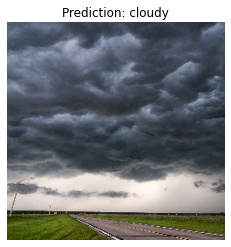

In [77]:
pred_and_plot(model=model, 
              filename="/content/test1", 
              class_names=class_names)